<a href="https://colab.research.google.com/github/JSJeong-me/GSC_openCV/blob/main/1002-yolo-cv-signal-RED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [ ]:
# pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [ ]:
import torch
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
torch.__version__

In [ ]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
img = 'traffic-signal-0.jpg'

# Inference
results = model(img)


In [6]:
src = cv2.imread(img)

In [7]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,186.217529,332.078949,292.308441,571.467773,0.875603,9,traffic light
1,374.334656,266.193054,486.072601,508.522278,0.860779,9,traffic light


In [8]:
signals = results.pandas().xyxy[0]

In [ ]:
type(signals)

In [9]:
signals.sort_values('ymin')

,xmin,ymin,xmax,ymax,confidence,class,name
1,374.334656,266.193054,486.072601,508.522278,0.860779,9,traffic light
0,186.217529,332.078949,292.308441,571.467773,0.875603,9,traffic light


xmin	ymin	xmax	ymax

In [11]:
x1, y1, x2, y2 = int(signals.iloc[1, 0]), int(signals.iloc[1, 1]), int(signals.iloc[1, 2]), int(signals.iloc[1, 3])

In [12]:
y1

266

259.308014	38.979904	364.986938	251.828140

In [13]:
signal0 = src[y1:y2, x1:x2]

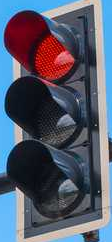

In [14]:
cv2_imshow(signal0)

In [15]:
import cv2
from google.colab.patches import cv2_imshow

In [16]:
src = cv2.imread(img)

In [18]:
x1, y1, x2, y2 = int(signals.iloc[1,0]), int(signals.iloc[1,1]), int(signals.iloc[1,2]), int(signals.iloc[1,3])

In [19]:
print(x1, y1, x2, y2)

374 266 486 508


In [20]:
signal1 = src[y1:y2, x1:x2]

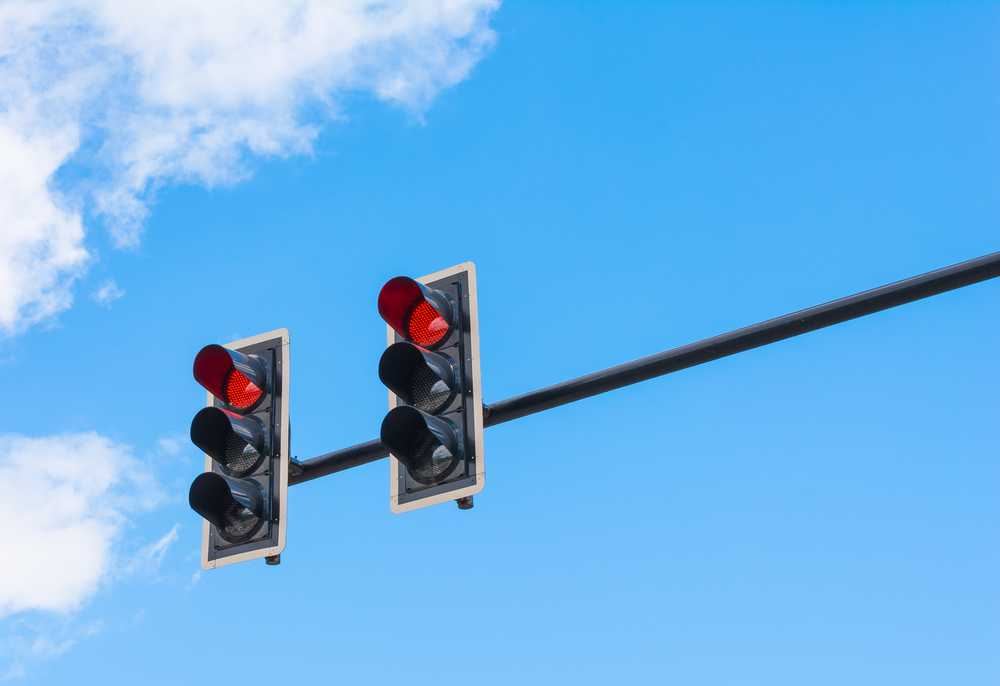

In [21]:
cv2_imshow(src)

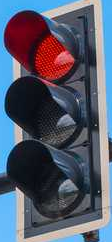

In [22]:
cv2_imshow(signal1)

In [23]:
import numpy as np

In [24]:
hsv_frame = cv2.cvtColor(signal1, cv2.COLOR_BGR2HSV)

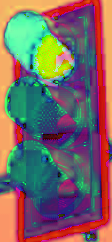

In [25]:
cv2_imshow(hsv_frame)

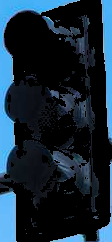

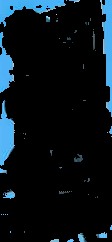

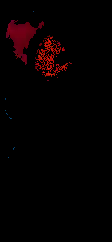

In [26]:
# Red color
low_red = np.array([1, 220, 90]) # 161,155,84 
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red, high_red)
red = cv2.bitwise_and(signal1, signal1, mask=red_mask)

# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(signal1, signal1, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(signal1, signal1, mask=green_mask)

# Every color except white
low = np.array([0, 42, 0])
high = np.array([179, 255, 255])
mask = cv2.inRange(hsv_frame, low, high)
result = cv2.bitwise_and(signal1, signal1, mask=mask)

#cv2_imshow(signal1)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)
#cv2_imshow(result)

H :0  199
S :100  255
V :142  221


H :0  72
S :128  255
V :67  255

In [27]:
l_h, u_h = 0,72
l_s, u_s = 128, 255
l_v, u_v = 67, 255

l_red = np.array([l_h, l_s, l_v])
u_red = np.array([u_h, u_s, u_v])

In [28]:
red_mask = cv2.inRange(hsv_frame, l_red, u_red)
red = cv2.bitwise_and(signal1, signal1, mask=red_mask)

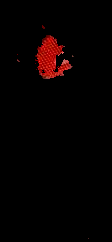

In [29]:
cv2_imshow(red)

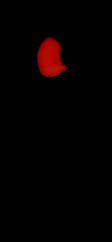

In [30]:
blur = cv2.medianBlur(red,15)
cv2_imshow(blur)

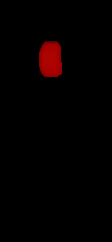

In [31]:
kernel = np.ones((12,12),np.uint8)
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)
cv2_imshow(shaved)